# Linear least-squares

In [41]:
using Polynomials
using Plots
using Random:seed!
using LinearAlgebra
using Interact


In [42]:
? Polynomial

search: Polynomial Polynomials LaurentPolynomial AbstractPolynomial



```
Polynomial{T<:Number}(coeffs::AbstractVector{T}, var=:x)
```

Construct a polynomial from its coefficients `a`, lowest order first, optionally in terms of the given variable `x`. `x` can be a character, symbol, or string.

If $p = a_n x^n + \ldots + a_2 x^2 + a_1 x + a_0$, we construct this through `Polynomial([a_0, a_1, ..., a_n])`.

The usual arithmetic operators are overloaded to work with polynomials as well as with combinations of polynomials and scalars. However, operations involving two polynomials of different variables causes an error except those involving a constant polynomial.

# Examples

```@meta
DocTestSetup = quote
    using Polynomials
end
```

```jldoctest
julia> Polynomial([1, 0, 3, 4])
Polynomial(1 + 3*x^2 + 4*x^3)

julia> Polynomial([1, 2, 3], :s)
Polynomial(1 + 2*s + 3*s^2)

julia> one(Polynomial)
Polynomial(1.0)
```


Let's create a polynomial 4 degree polynomial

In [43]:
p = Polynomial( [-4., -2., -1., 1., 3.] )

Polynomial(-4.0 - 2.0*x - 1.0*x^2 + 1.0*x^3 + 3.0*x^4)

In [44]:
? plot

search: plot plot! plotly plot3d Plots plot3d! plotlyjs plotattr plotarea



The main plot command. Use `plot` to create a new plot object, and `plot!` to add to an existing one:

```
    plot(args...; kw...)                  # creates a new plot window, and sets it to be the current
    plot!(args...; kw...)                 # adds to the `current`
    plot!(plotobj, args...; kw...)        # adds to the plot `plotobj`
```

There are lots of ways to pass in data, and lots of keyword arguments... just try it and it will likely work as expected. When you pass in matrices, it splits by columns. To see the list of available attributes, use the `plotattr([attr])` function, where `attr` is the symbol `:Series:`, `:Subplot:`, `:Plot` or `:Axis`. Pass any attribute to `plotattr` as a String to look up its docstring; e.g. `plotattr("seriestype")`.


Plot the polynomial and the roots.

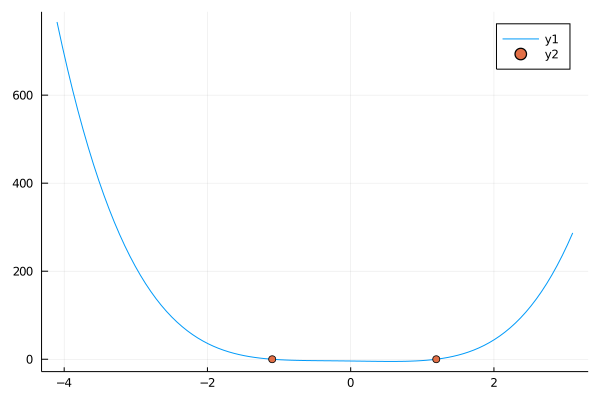

In [45]:
xlim = (-4.1, 3.1)

t = range(xlim[1], stop=xlim[2], length=100)
plot(t, p.(t))

# plot( t->p(t), xlim... )
r = roots(p)
real_r = real([n for n in r if isreal(n)])

scatter!(real_r, zeros(length(real_r)))

The following function samples the polynomial $p(t)$ at $m$ random points $t_1,t_2,\ldots,t_m$, and adds noise with magnitude $\eta$.

In [46]:
function gen_data(p, m, η=20)
   seed!(0)
   t = randn(m)
   noise = randn(m); noise *= η/norm(noise)
   b = p.(t) + noise
   return t, b
end;

Use this data generator to create $m=100$ noisy samples from the polynomial:

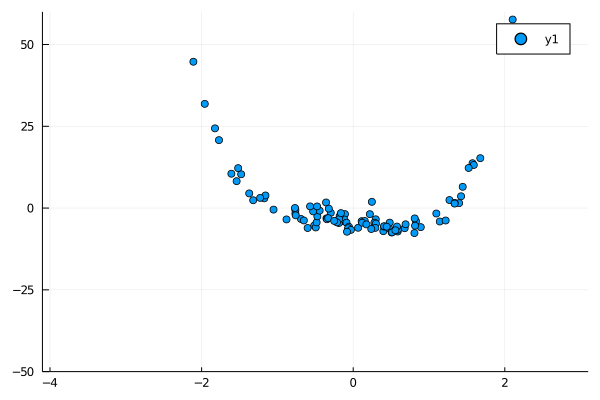

In [47]:
m = 100
t, b = gen_data(p, m);
scatter( t, b, xlim=xlim, ylim=(-50,60) )


Compute a polynomial fit using `fit` from the `Polynomial` module.

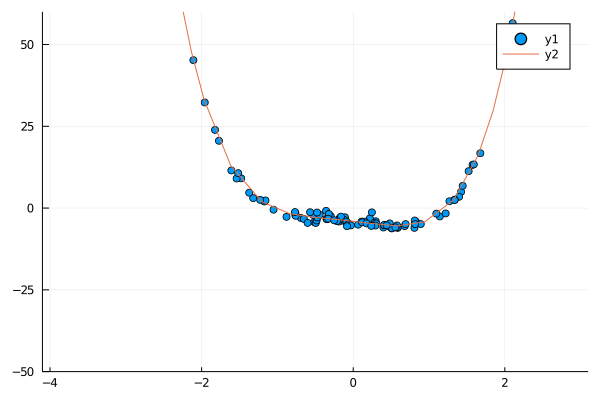

In [48]:
# Compute polynomial fit

d = 5
η = 10
t, b = gen_data(p, m, η)
pp = fit(t, b, d)
scatter(t, b, xlim=xlim, ylim=(-50,60))
plot!( t->pp(t), xlim... )


Let's now do this manually, by creating the data for the least-square problem.

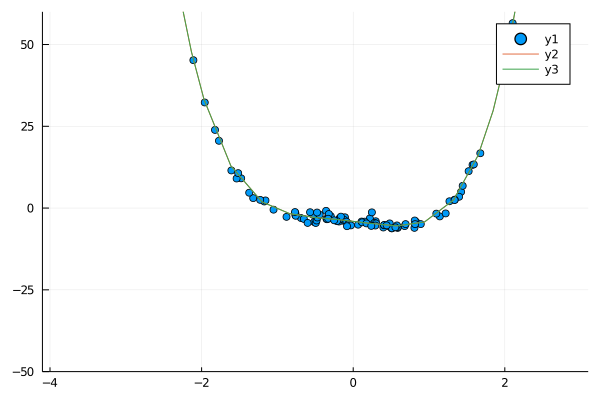

In [49]:
d = 5
A = [ t[i]^k for i=1:m, k=0:d ] #Vandermonde matrix
x = A \ b
pp = Polynomial(x)
plot!( t->pp(t), xlim = (-4.1,3.1), ylim=(-50,60) )